In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [11]:
train_features= pd.read_csv('dengue_features_train.csv')

In [12]:
train_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [13]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [15]:
train_labels=pd.read_csv('dengue_labels_train.csv')

In [20]:
train_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [16]:
print(train_features.shape)
print(train_labels.shape)

(1456, 24)
(1456, 4)


In [21]:
df1= train_features.copy()
df2= train_labels.copy()

first step is to join the train features and the train labels datasets.

In [23]:
merged_df = pd.merge(df1, df2, on=['city', 'year', 'weekofyear'])

In [52]:
merged_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,month
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,5
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,5
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,5


In [112]:
merged_df.shape

(1456, 26)

In [ ]:
# I will now work on the merged dataset

In [35]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   city                                   1456 non-null   object        
 1   year                                   1456 non-null   int64         
 2   weekofyear                             1456 non-null   int64         
 3   week_start_date                        1456 non-null   datetime64[ns]
 4   ndvi_ne                                1456 non-null   float64       
 5   ndvi_nw                                1456 non-null   float64       
 6   ndvi_se                                1456 non-null   float64       
 7   ndvi_sw                                1456 non-null   float64       
 8   precipitation_amt_mm                   1456 non-null   float64       
 9   reanalysis_air_temp_k                  1456 non-null   float64 

I will change the week start date to the correct date format. It will help me in the initial analysis

In [53]:
merged_df['week_start_date'] = pd.to_datetime(merged_df['week_start_date'])

get the months and the years. It is good to check the trend.

In [36]:
merged_df['year'] = merged_df['week_start_date'].dt.year
merged_df['month'] = merged_df['week_start_date'].dt.month

check for nulls

In [30]:
merged_df.isna().sum()/len(merged_df)

city                                     0.000000
year                                     0.000000
weekofyear                               0.000000
week_start_date                          0.000000
ndvi_ne                                  0.133242
ndvi_nw                                  0.035714
ndvi_se                                  0.015110
ndvi_sw                                  0.015110
precipitation_amt_mm                     0.008929
reanalysis_air_temp_k                    0.006868
reanalysis_avg_temp_k                    0.006868
reanalysis_dew_point_temp_k              0.006868
reanalysis_max_air_temp_k                0.006868
reanalysis_min_air_temp_k                0.006868
reanalysis_precip_amt_kg_per_m2          0.006868
reanalysis_relative_humidity_percent     0.006868
reanalysis_sat_precip_amt_mm             0.008929
reanalysis_specific_humidity_g_per_kg    0.006868
reanalysis_tdtr_k                        0.006868
station_avg_temp_c                       0.029533


The dataframe has some variables with nulls\
There are variuos way to deal with nulls\
You can drop them\
you can forward fill

Since this datasets has date columns- a time series. I will forward fill

In [31]:
merged_df.fillna(method='ffill', inplace=True)

### EXPLORATORY DATA ANALYSIS

In [39]:
# plot total cases against months
month_grouped= merged_df.groupby('month').sum()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6048\2053255117.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month_grouped= merged_df.groupby('month').sum()


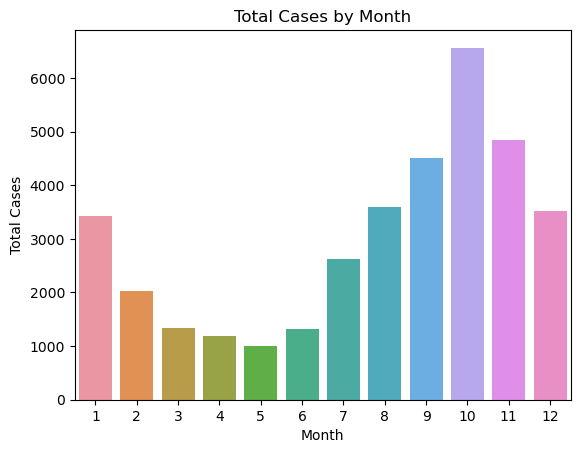

In [51]:
sns.barplot(x=month_grouped.index, y=month_grouped['total_cases'])
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.title('Total Cases by Month');

**Observation**\
The total cases of dengue fever starts to increase from August.


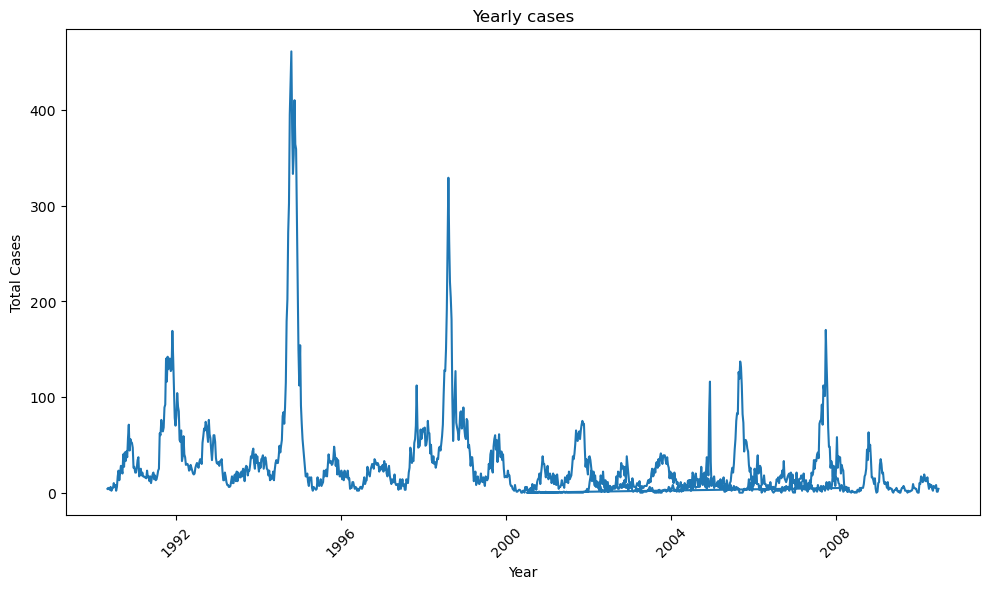

In [56]:
# year vs total cases
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(merged_df['week_start_date'], merged_df['total_cases'])
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Yearly cases')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability with many dates
plt.tight_layout()
plt.show()

**Observations**\
The Dengue Fever is seasonal with the highest recorded case being in 1995

In [65]:
# Correlation plot
corr_columns=['ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases']

In [66]:
correlations=merged_df[corr_columns]

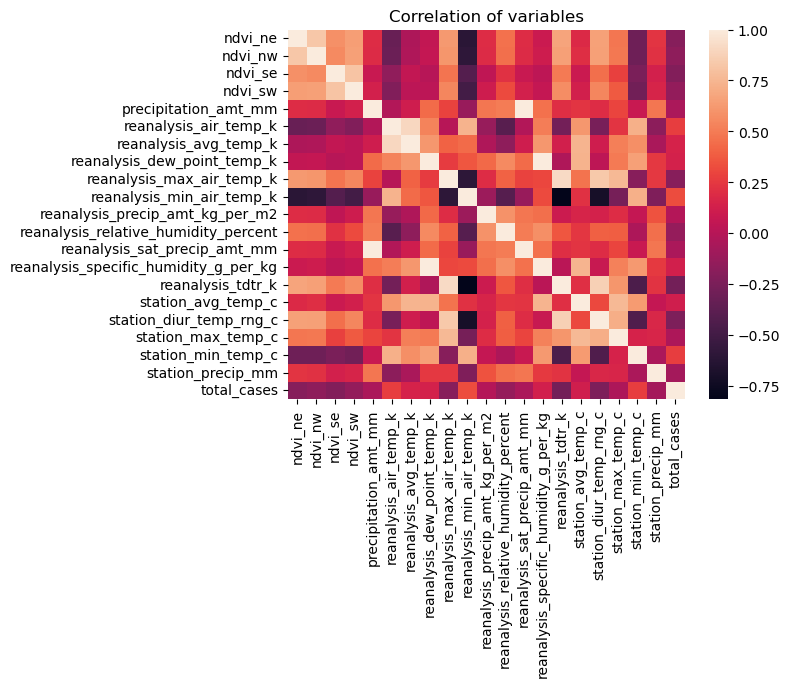

In [74]:
corr = correlations.corr()
# plot heatmap
corr_heat = sns.heatmap(corr)
plt.title('Correlation of variables');

<Axes: >

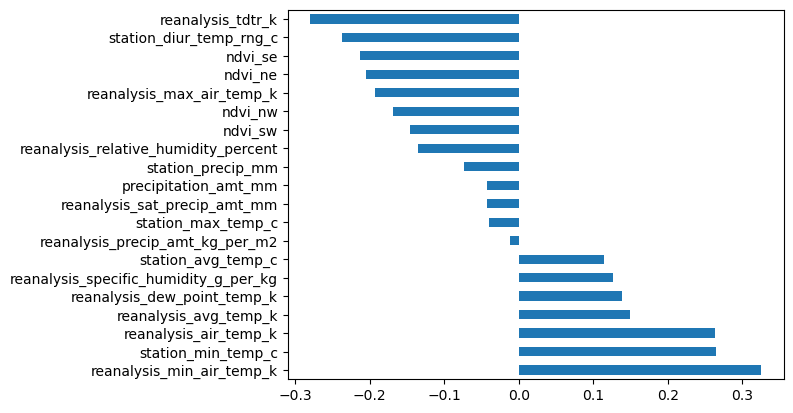

In [100]:
(corr
     .total_cases
     .drop('total_cases') 
     .sort_values(ascending=False)
     .plot
     .barh())

**Observations**\
The total cases is hughly correlated with humid variables and wet tempeartures\
Interestingly, the precipitation measurements bear little to no correlation to total_cases.\
Vegetation has no efffect on the rise of dengue fever


## working on the two towns separetly

I will split them, and analyze them seperately.

In [81]:
sj_data=merged_df[merged_df['city'] == 'sj']

In [104]:
sj_data.shape

(936, 26)

In [83]:
iq_data=merged_df[merged_df['city'] == 'iq']

Let me check the distribution of the total cases/ target column in the two cities

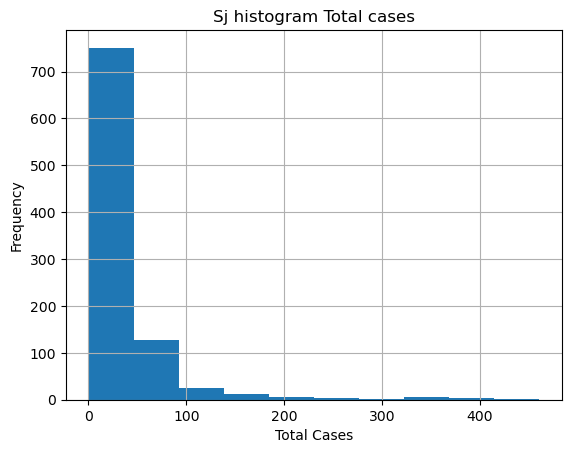

In [87]:
sj_data['total_cases'].hist()
plt.xlabel('Total Cases')
plt.ylabel('Frequency')
plt.title('Sj histogram Total cases');

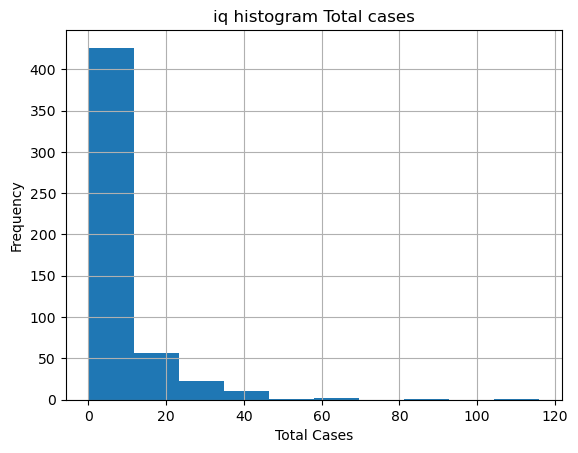

In [88]:
iq_data['total_cases'].hist()
plt.xlabel('Total Cases')
plt.ylabel('Frequency')
plt.title('iq histogram Total cases');

both the histograms are negatively skewed

Looking at the total cases trend of the two towns

## Monthly trend

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6048\1437793077.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sj_month_grouped= sj_data.groupby('month').sum()


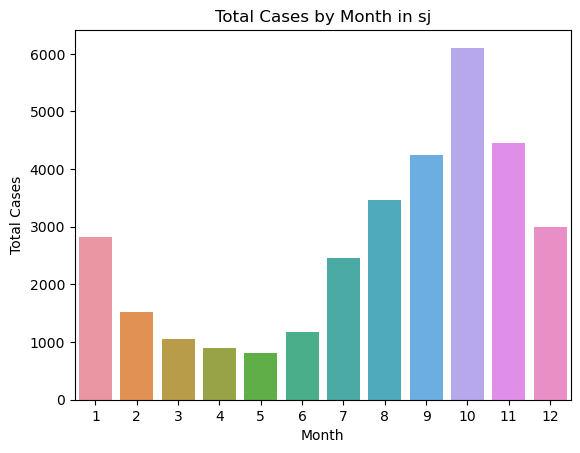

In [111]:
sj_month_grouped= sj_data.groupby('month').sum()
sns.barplot(x=sj_month_grouped.index, y=sj_month_grouped['total_cases'])
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.title('Total Cases by Month in sj');

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6048\227081343.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  iq_month_grouped= iq_data.groupby('month').sum()


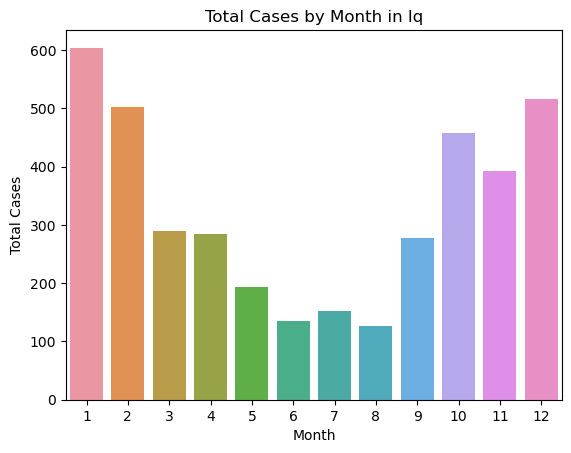

In [113]:
iq_month_grouped= iq_data.groupby('month').sum()
sns.barplot(x=iq_month_grouped.index, y=iq_month_grouped['total_cases'])
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.title('Total Cases by Month in Iq');

**Observations**\
The Sj town cases of dengue fever is high from August to December\
The Iq town dengue fever cases is high in two periods of the year- Jaanuary to February and October to December

## Correlation

In [114]:
sj_corr=sj_data[corr_columns]
iq_corr=iq_data[corr_columns]

In [115]:
# compute the correlations
sj_correlations = sj_corr.corr()
iq_correlations = iq_corr.corr()

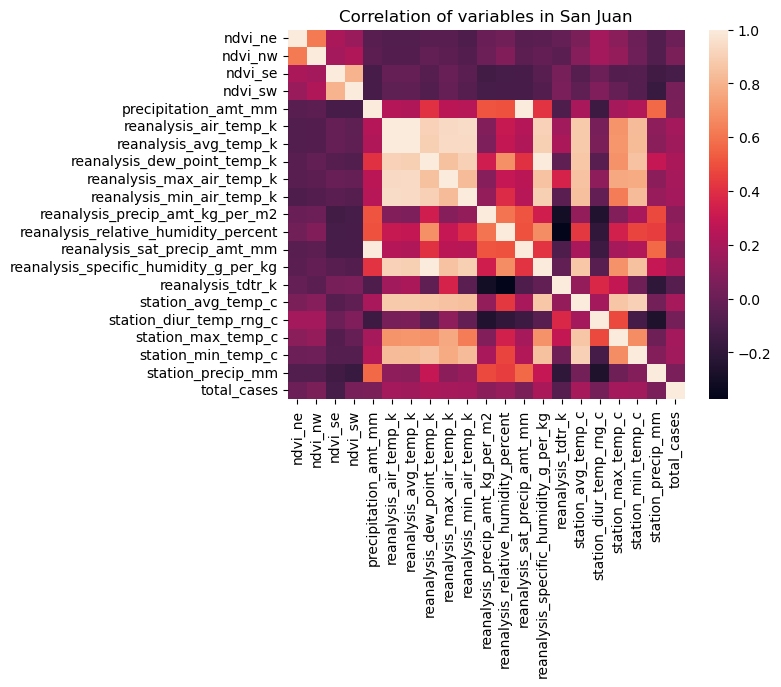

In [116]:
# plot a heatmap for Saint Juan
corr_heat_san = sns.heatmap(sj_correlations)
plt.title('Correlation of variables in San Juan');

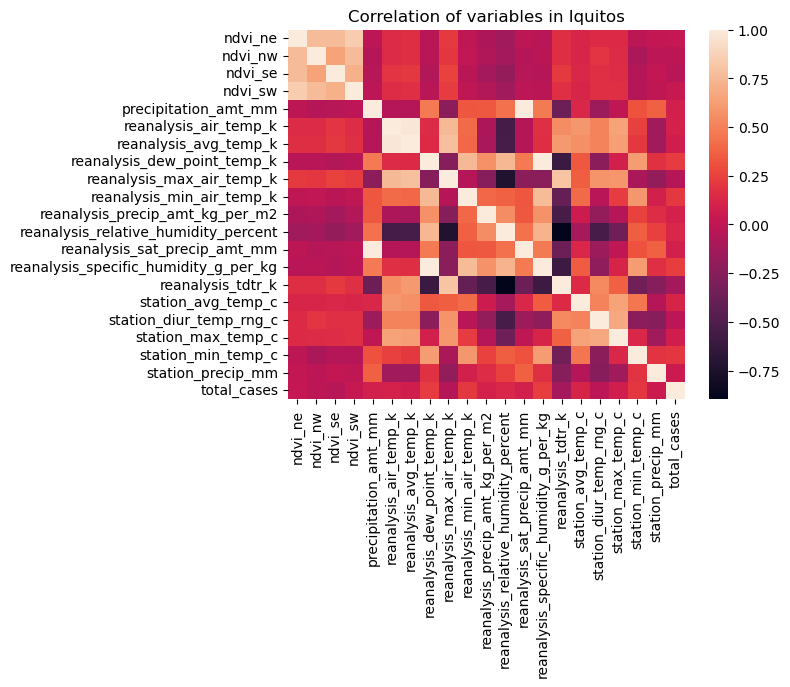

In [117]:
# plot a heatmap for Saint Juan
corr_heat_iq = sns.heatmap(iq_correlations)
plt.title('Correlation of variables in Iquitos');

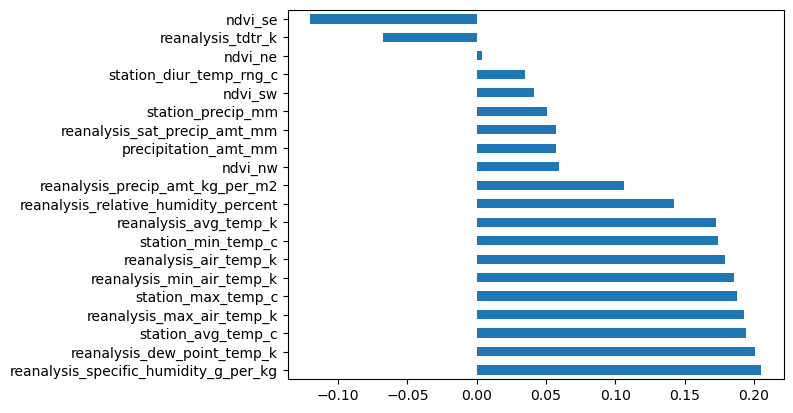

In [119]:
# San Juan
(sj_correlations
     .total_cases
     .drop('total_cases') 
     .sort_values(ascending=False)
     .plot
     .barh());

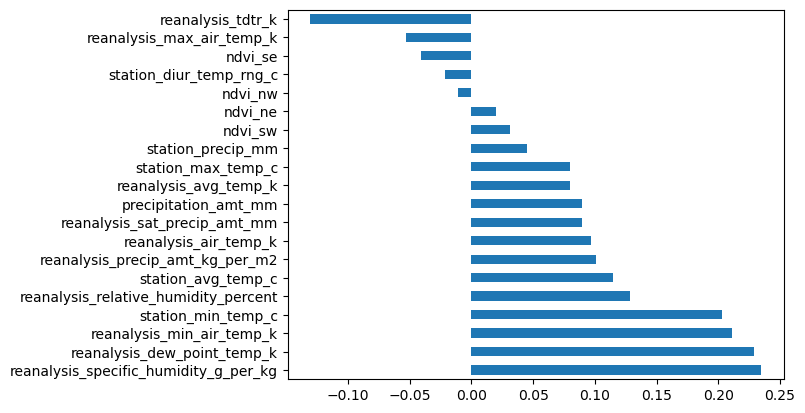

In [121]:
# Iquitos
(iq_correlations
     .total_cases
     .drop('total_cases') 
     .sort_values(ascending=False)
     .plot
     .barh());

## Yearly trend

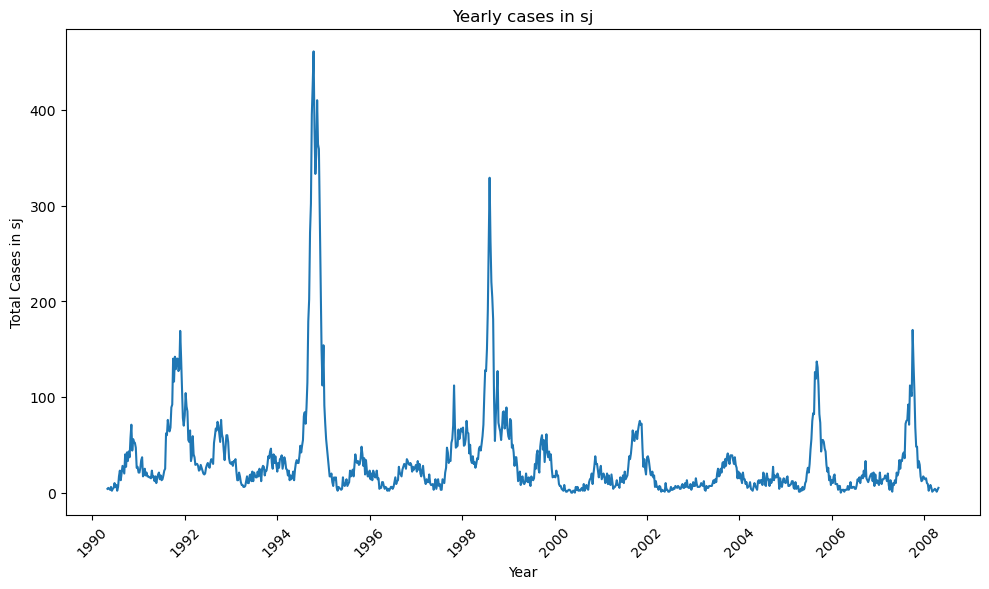

In [109]:
# year vs total cases -in sj
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(sj_data['week_start_date'], sj_data['total_cases'])
plt.xlabel('Year')
plt.ylabel('Total Cases in sj')
plt.title('Yearly cases in sj')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability with many dates
plt.tight_layout()
plt.show()

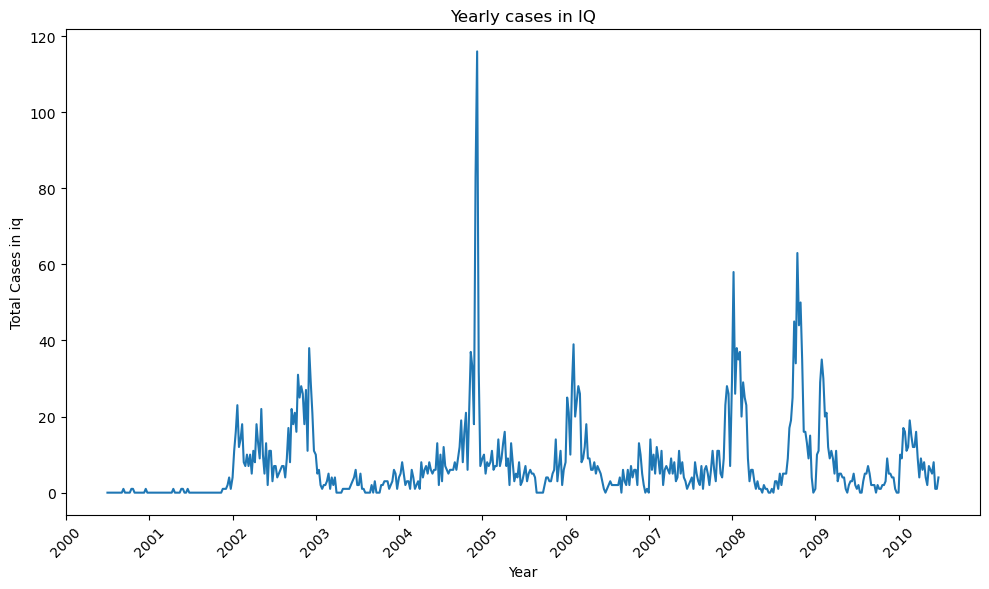

In [108]:
# year vs total cases -in iq
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(iq_data['week_start_date'], iq_data['total_cases'])
plt.xlabel('Year')
plt.ylabel('Total Cases in iq')
plt.title('Yearly cases in IQ')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

The trend is seasonal with Iq town seasons being from the end of the year to the start of the year